In [7]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

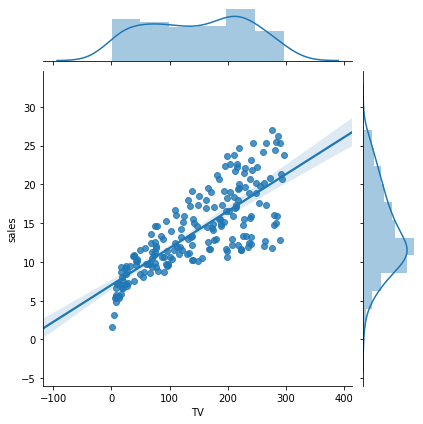

In [12]:
sns.jointplot(x="TV",y="sales",data=df,kind = "reg")

In [57]:
from sklearn.linear_model import LinearRegression
X = df[["TV"]]

In [16]:
y = df[["sales"]]

In [19]:
reg = LinearRegression()

In [59]:
model = reg.fit(X,y)
# model = LinearRegression().fit(X,y)

In [21]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [58]:
model.score(X,y)

0.611875050850071

In [23]:
model.coef_

array([[0.04753664]])

In [24]:
model.intercept_

array([7.03259355])

# Tahmin

Text(0, 0.5, 'Satış')

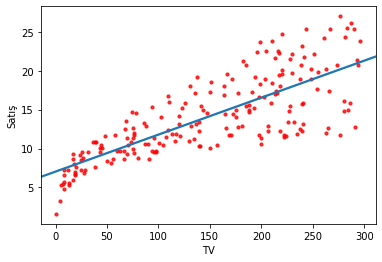

In [50]:
g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws = {"color":"r","s":10})
g.set_ylabel("Satış")

In [40]:
model.predict([[165],[180],[140]])

array([[14.87613922],
       [15.58918883],
       [13.68772321]])

# Artıklar

In [63]:
y.head() #gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [64]:
model.predict(X)[:6] #tahmin edilen değerler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [84]:
gercek_y = y[:20]

In [85]:
tahmin_y = pd.DataFrame(model.predict(X)[:20])

In [86]:
hatalar = pd.concat([gercek_y,tahmin_y],axis=1)
hatalar

,sales,0
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [87]:
hatalar.columns = ["gercek","tahmin"]

In [88]:
hatalar["hata"] = hatalar["gercek"]-hatalar["tahmin"]

In [89]:
hatalar["hata_kareler"] = hatalar["hata"]**2
hatalar["hata_kareler"].mean() 

8.23368644403695

# Çoklu Doğrusal Regrasyon

In [90]:
X = df.drop("sales",axis=1)
y = df["sales"]

In [98]:
#Stats models
import statsmodels.api as sm
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                   2.43e-171
Time:                        16:49:37   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#scikit
lm = LinearRegression()
model = lm.fit(X,y)

NameError: name 'LinearRegression' is not defined

In [112]:
# 30 TV, 10 radio, 40 newspaper
veri = [[30],[10],[40]]
veri = pd.DataFrame(veri).T
model.predict(veri)

array([6.15562918])

In [114]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,model.predict(X))

2.784126314510936

# Model Tuning

In [115]:
from sklearn.model_selection import train_test_split 

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 99)
X_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [122]:
X_test.head()

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [123]:
y_test.head()

135    11.6
127     8.8
191     9.9
66      9.5
119     6.6
Name: sales, dtype: float64

In [124]:
y_train.head()

16     12.5
51     10.7
97     15.5
164    11.9
71     12.4
Name: sales, dtype: float64

In [126]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

import numpy as np
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

# k katlı cv

In [2]:
from sklearn.model_selection import cross_val_score 

In [3]:
cross_val_score(model,X_train,y_train,cv=10,scoring = "neg_mean_squared_error")

NameError: name 'model' is not defined

In [137]:
np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring = "neg_mean_squared_error"))

3.317028974234127

In [138]:
np.sqrt(np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring = "neg_mean_squared_error")))

1.821271252239525